In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


# 1. Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

sns.set(style="whitegrid")

# 2. Load Dataset

In [3]:
df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

print("Shape:", df.shape)
df.head()

Shape: (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# 3. Missing Values Check

In [4]:
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


## Percentage of missing values

In [5]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of Missing Values per Column:")
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))


Percentage of Missing Values per Column:
director      29.908028
country        9.435676
cast           9.367549
date_added     0.113546
rating         0.045418
duration       0.034064
dtype: float64


# 4. Data Cleaning

## Handle missing categorical values

In [6]:
df['country'] = df['country'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Not Available")
df['director'] = df['director'].fillna("Not Available")

## Fix and parse 'date_added' column (remove spaces + safe conversion)

In [7]:
df['date_added'] = df['date_added'].astype(str).str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


## Convert date to datetime, then keep YYYY-MM-DD format

In [8]:
df['date_added'] = pd.to_datetime(df['date_added'], errors="coerce")
df['date_added'] = df['date_added'].dt.strftime('%Y-%m-%d')

## Extract year and month name

In [9]:
df['year_added'] = pd.to_datetime(df['date_added'], errors="coerce").dt.year.astype("Int64")
df['month_added'] = pd.to_datetime(df['date_added'], errors="coerce").dt.month_name()

## Drop duplicates

In [10]:
df.drop_duplicates(inplace=True)

print("After cleaning:", df.shape)

After cleaning: (8807, 14)


# 5. Descriptive Statistics

In [11]:
print("\nMovies vs TV Shows:\n", df['type'].value_counts())
print("\nTop 10 Countries:\n", df['country'].value_counts().head(10))
print("\nRatings:\n", df['rating'].value_counts())


Movies vs TV Shows:
 type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Top 10 Countries:
 country
United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

Ratings:
 rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


# 6. Visualizations

# Movies vs TV Shows

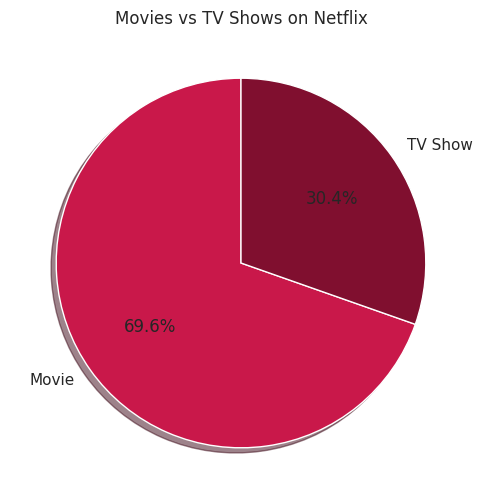

In [12]:
plt.figure(figsize=(6,6))
df['type'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['#c9184a','#800f2f'],
    startangle=90,
    shadow=True
)
plt.title("Movies vs TV Shows on Netflix")
plt.ylabel("")
plt.show()

## Growth over years

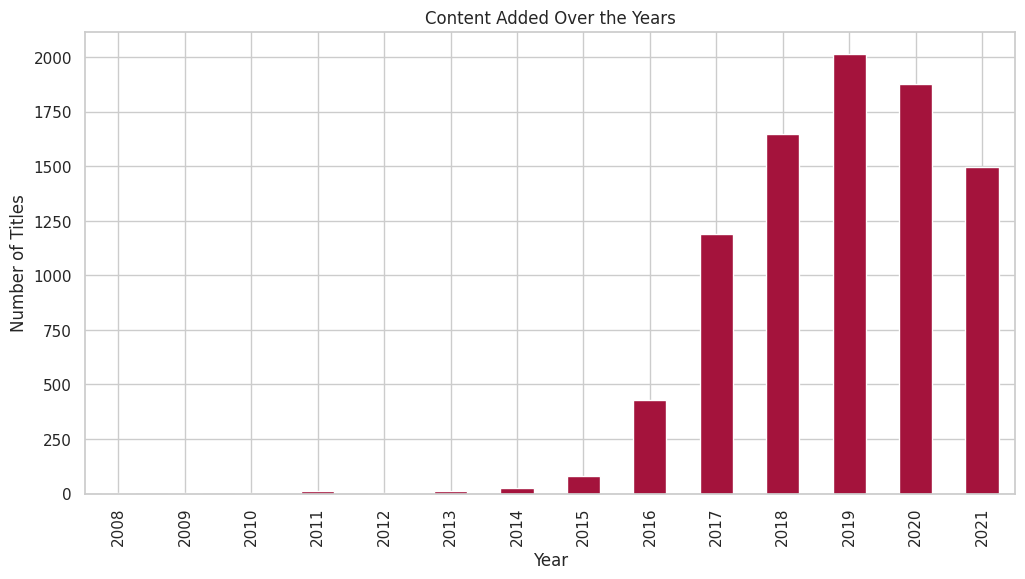

In [13]:
plt.figure(figsize=(12,6))
df['year_added'].value_counts().sort_index().plot(kind='bar', color='#a4133c')
plt.title("Content Added Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

## Top 10 countries

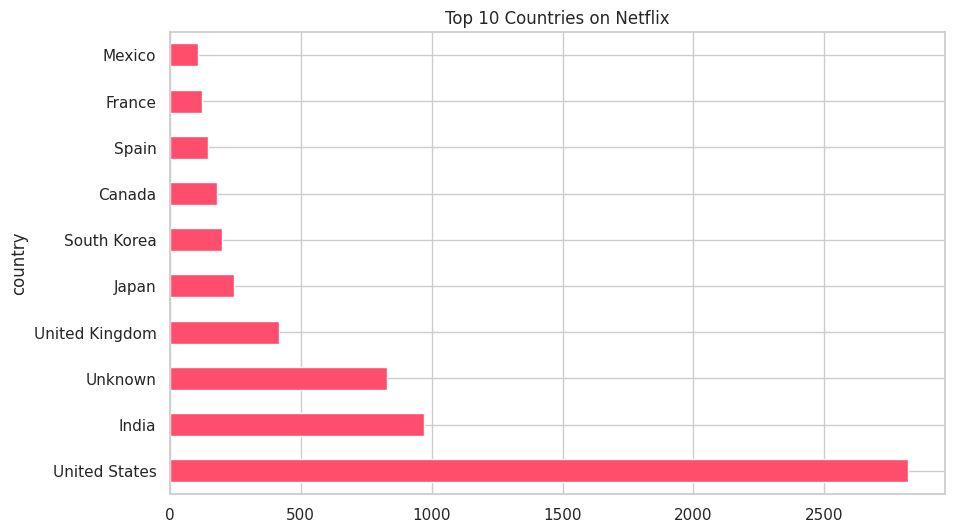

In [14]:
plt.figure(figsize=(10,6))
df['country'].value_counts().head(10).plot(kind='barh', color='#ff4d6d')
plt.title("Top 10 Countries on Netflix")
plt.show()

## Top genres

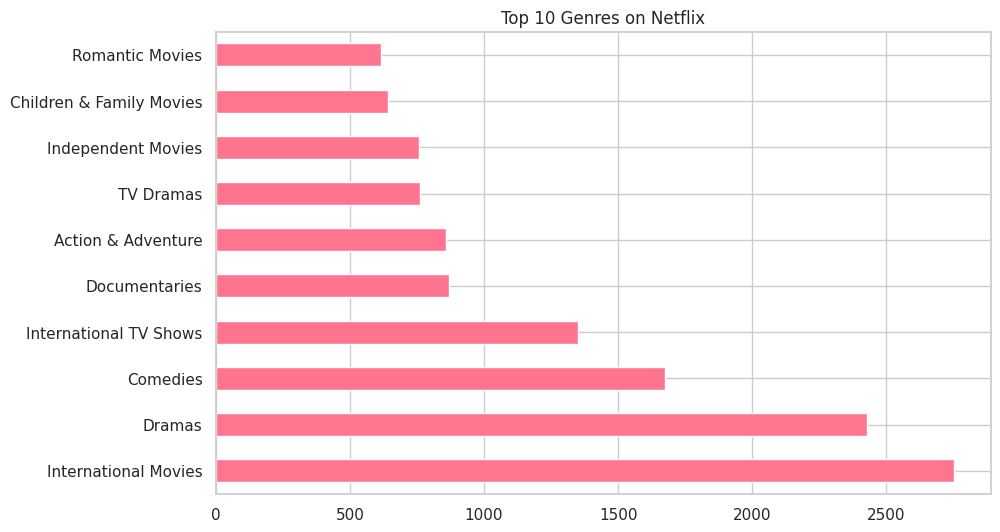

In [15]:
genres = df['listed_in'].dropna().apply(lambda x: x.split(", "))
flat_genres = [g for sub in genres for g in sub]
genre_count = pd.Series(Counter(flat_genres)).sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
genre_count.plot(kind='barh', color='#ff758f')
plt.title("Top 10 Genres on Netflix")
plt.show()

## Ratings distribution

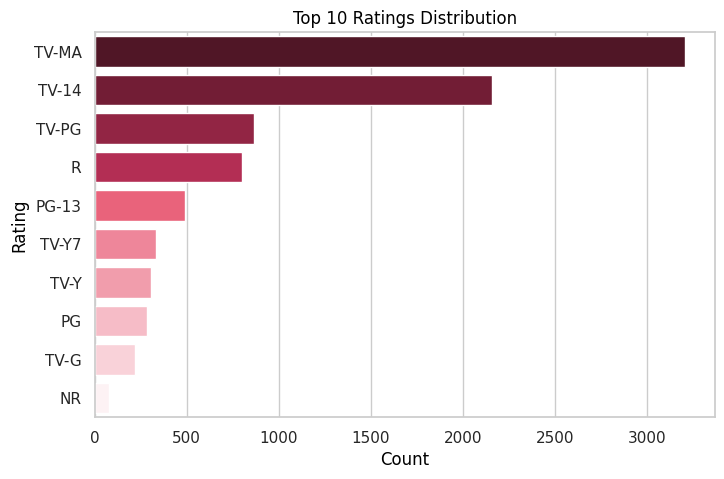

In [16]:
plt.figure(figsize=(8,5))
top_ratings = df['rating'].value_counts().head(10).index
sns.countplot(
    y='rating',
    data=df[df['rating'].isin(top_ratings)],
    order=top_ratings,
    palette=[
        '#590d22','#800f2f','#a4133c','#c9184a',
        '#ff4d6d','#ff758f','#ff8fa3','#ffb3c1',
        '#ffccd5','#fff0f3'
    ]
)
plt.title("Top 10 Ratings Distribution", color="black")
plt.xlabel("Count", color="black")
plt.ylabel("Rating", color="black")
plt.show()

# 7. Insights

In [17]:
print("INSIGHTS")
print("- Movies dominate the catalog (~70%), but TV shows are growing faster.")
print("- Huge spike in titles added after 2015 → global expansion phase.")
print("- USA, India, UK, and Japan are top contributors.")
print("- Drama, International Movies, and Thrillers are top genres.")

INSIGHTS
- Movies dominate the catalog (~70%), but TV shows are growing faster.
- Huge spike in titles added after 2015 → global expansion phase.
- USA, India, UK, and Japan are top contributors.
- Drama, International Movies, and Thrillers are top genres.


# 8. Export Clean Data

## Save cleaned dataset as XLSX

In [18]:
df.to_excel("cleaned_netflix.xlsx", index=False)
print("Exported cleaned dataset: cleaned_netflix.xlsx")

Exported cleaned dataset: cleaned_netflix.xlsx


## Save cleaned dataset as CSV

In [19]:
df.to_csv("cleaned_netflix.csv", index=False)
print("Exported cleaned dataset: cleaned_netflix.csv")

Exported cleaned dataset: cleaned_netflix.csv
